<a href="https://colab.research.google.com/github/yahiachames/Apriori/blob/main/deep_dive_into_neural_network_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importation des Bibliothèques


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#Création du dataset


In [81]:
X,y= make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)


In [82]:
X.shape

(100, 2)

In [83]:
y.shape

(100,)

In [84]:
y=y.reshape(y.shape[0],1)

In [85]:
y.shape

(100, 1)

#Definir les parametres initiaux du model

In [86]:
def initialization(X):
 """
 Initialise les poids W et le biais bavec des valeurs aléatoires.
 Arguments:
 X -- la matrice features
 Retourne:
 w -- vecteur de forme (X.shape[1], 1)
 b -- scalaire initialisé aléatoirement
 """
 w = np.random.randn(X.shape[1], 1)
 b = np.random.randn(1) # scalaire
 return w,b

In [87]:
w,b =initialization(X)

In [88]:
print(w)

[[0.60370323]
 [1.62754476]]


In [89]:
print(b)

[-0.62167435]


#Definition du model

In [90]:
def model(X,w,b):
  Z=np.dot(X,w) + b
  A=1/(1+np.exp(-Z))
  return A

#Fonction Coût (Log-Loss)

In [91]:
def log_loss(A, y):
 """
 Calcule le coût log-loss (entropie croisée binaire).
 Arguments:
 A -- vecteur des activations (m, 1)
 y -- vecteur des vraies étiquettes (m, 1)
 Retourne:
 cost -- coût log-loss
 """
 m = y.shape[0] # Nombre d'échantillons
 epsilon = 1e-15 # Pour éviter log(0) ou log(1)
 # Clip A pour éviter log(0) ou log(1)
 A = np.clip(A, epsilon, 1 - epsilon)
 cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
 return cost

In [92]:
loss=log_loss(model(X,w,b),y)/100

In [93]:
print(loss)

0.03635264584574971


#Calcul des Gradients

In [94]:
def gradiant(X, A, y):
 """
 Implémente la rétropropagation pour calculer les gradients.
 Arguments:
 X -- matrice des caractéristiques (m, n_features)
 A -- vecteur des activations (m, 1)
 y -- vecteur des vraies étiquettes (m, 1)
 Retourne:
 dW -- gradient des poids (n_features, 1)
 db -- gradient du biais (scalaire)
 """
 m = y.shape[0] # Nombre d'échantillons
 dZ = A - y # Gradient de la fonction sigmoïde par rapport à Z (m, 1)
 dW = 1/m * X.T.dot(dZ) # Gradient des poids (n_features, m) @ (m, 1) = (n_features, 1)
 db = 1/m * np.sum(dZ) # Gradient du biais (scalaire)
 return dW, db

In [95]:
def update(w,b,dw,db,L_rate = 0.01):
  w  =w - L_rate * dw
  b = b - L_rate * db
  return w,b

In [96]:
def training(x,y,L_rate,epochs):
  w,b=initialization(x)
  LL = []
  for i in range(epochs):
    A=model(x,w,b)
    loss=log_loss(A,y)
    LL.append(loss)
    dw,db=gradiant(x,A,y)
    w,b = update(w,b,dw,db,L_rate)
  return w,b,LL

In [97]:
w,b,LL = training(X,y,0.05,1000)

In [98]:
def predict(A):
  A[A>0.5]=1
  A[A<=0.5]=0
  return A

In [99]:
def score(A,y):
  y_pred = predict(A)
  return accuracy_score(y,y_pred)

In [100]:
s = score(model(X,w,b),y)
print(s)

0.92


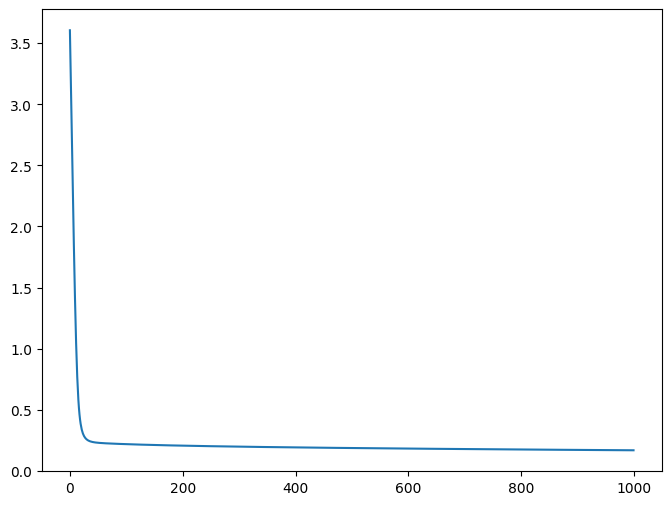

In [101]:
plt.figure(figsize=(8,6))
plt.plot(range(1000) , LL)
plt.show()

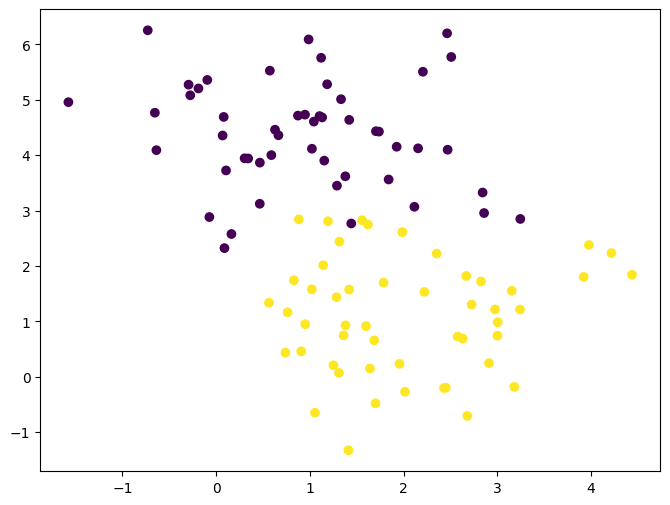

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y.reshape(-1))
plt.show()

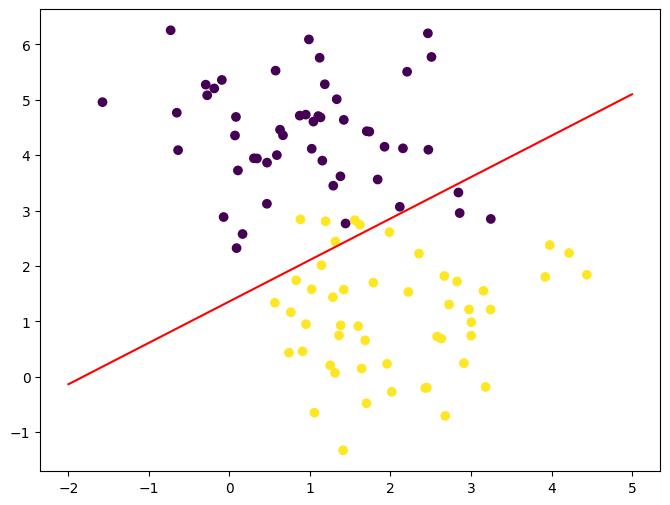

In [103]:
x1 = np.linspace(-2, 5, 50)
x2 = -b/w[1] - w[0]/w[1]*x1
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y.reshape(-1))
plt.plot(x1,x2,color='red')


In [104]:
x = np.array([[0,0], [1,0] , [0,1] , [1,1]])
y = np.array([0,0,0,1])

In [105]:
w,b,LL = training(X,y,0.05,1000)

1.0


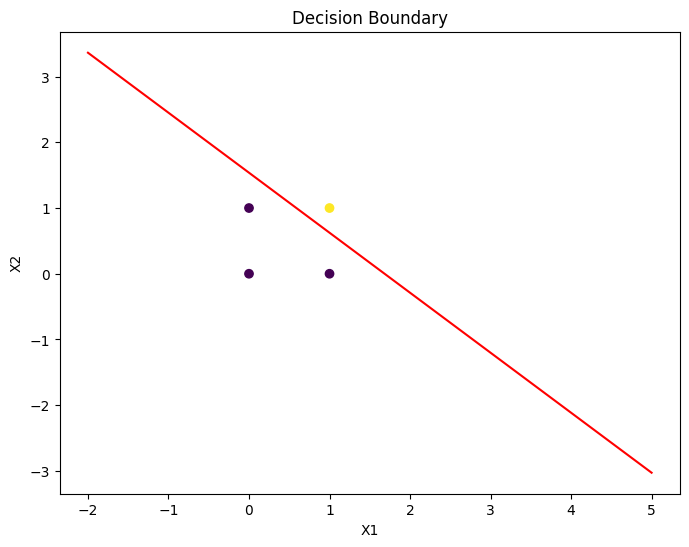

In [112]:
# and
X_original = np.array([[0,0], [1,0] , [0,1] , [1,1]])
y_original = np.array([0,0,0,1])
y_original=y_original.reshape(y_original.shape[0],1)
w, b, LL = training(X_original, y_original, 0.05, 1000)

x1 = np.linspace(-2, 5, 50)
x2 = (-b - w[0] * x1) / w[1]  # Corrected line equation calculation
s = score(model(X_original,w,b),y_original)
print(s)

plt.figure(figsize=(8,6))
plt.scatter(X_original[:,0], X_original[:,1], c=y_original.reshape(-1))
plt.plot(x1,x2,color='red')
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

1.0


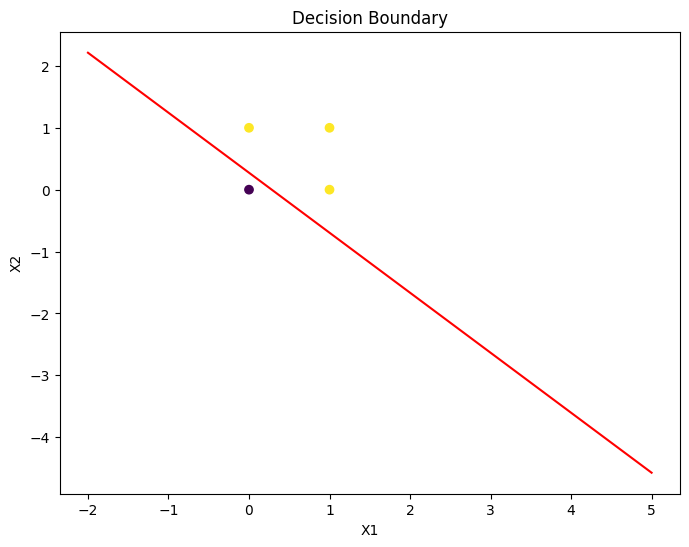

In [113]:
# and
X_original = np.array([[0,0], [1,0] , [0,1] , [1,1]])
y_original = np.array([0,1,1,1])
y_original=y_original.reshape(y_original.shape[0],1)
w, b, LL = training(X_original, y_original, 0.05, 1000)

x1 = np.linspace(-2, 5, 50)
x2 = (-b - w[0] * x1) / w[1]  # Corrected line equation calculation
s = score(model(X_original,w,b),y_original)
print(s)

plt.figure(figsize=(8,6))
plt.scatter(X_original[:,0], X_original[:,1], c=y_original.reshape(-1))
plt.plot(x1,x2,color='red')
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

1.0


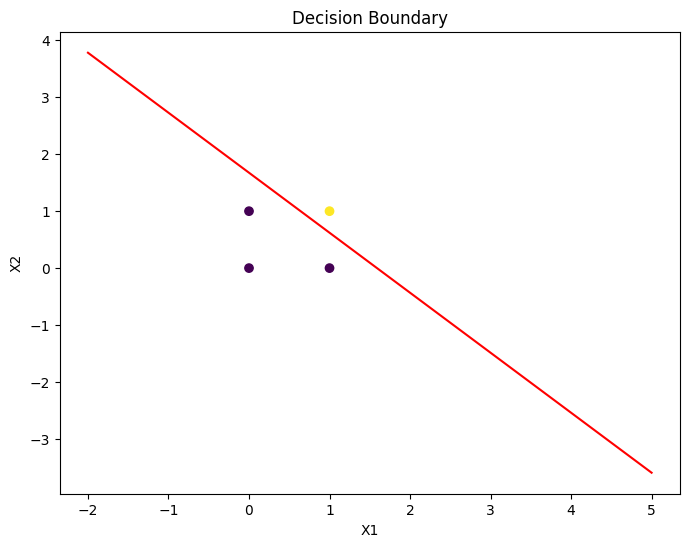

In [114]:
# and
X_original = np.array([[0,0], [1,0] , [0,1] , [1,1]])
y_original = np.array([0,0,0,1])
y_original=y_original.reshape(y_original.shape[0],1)
w, b, LL = training(X_original, y_original, 0.05, 1000)

x1 = np.linspace(-2, 5, 50)
x2 = (-b - w[0] * x1) / w[1]  # Corrected line equation calculation
s = score(model(X_original,w,b),y_original)
print(s)

plt.figure(figsize=(8,6))
plt.scatter(X_original[:,0], X_original[:,1], c=y_original.reshape(-1))
plt.plot(x1,x2,color='red')
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

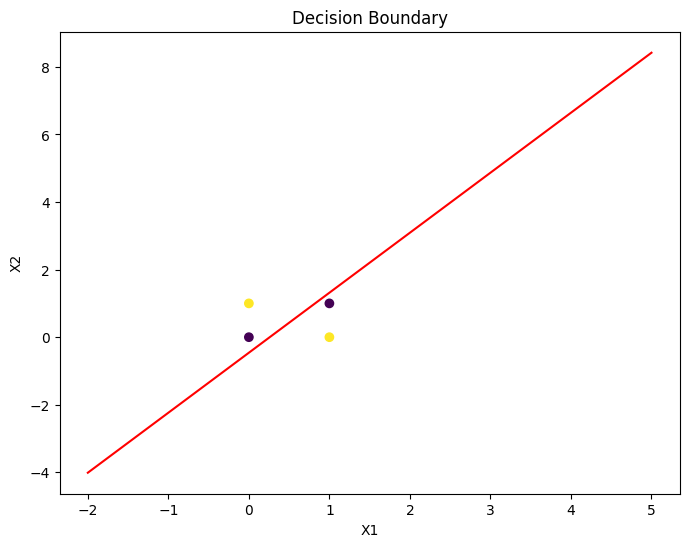

In [109]:
# and
X_original = np.array([[0,0], [1,0] , [0,1] , [1,1]])
y_original = np.array([0,1,1,0])
y_original=y_original.reshape(y_original.shape[0],1)
w, b, LL = training(X_original, y_original, 0.05, 1000)

x1 = np.linspace(-2, 5, 50)
x2 = (-b - w[0] * x1) / w[1]  # Corrected line equation calculation

plt.figure(figsize=(8,6))
plt.scatter(X_original[:,0], X_original[:,1], c=y_original.reshape(-1))
plt.plot(x1,x2,color='red')
plt.title('Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [116]:
classifier = MLPClassifier((2,),learning_rate_init=0.05,max_iter=1000)

In [117]:
model = classifier.fit(X_original,y_original)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
model.score(X_original,y_original)

1.0

In [119]:
z = model.predict(X_original)

In [120]:


Z = z.reshape(X_original.shape)

# 5️⃣ Plot decision regions + data points
plt.figure(figsize=(6,5))
plt.contourf(X_original, y_original, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("MLP Decision Boundary (hidden_layer_sizes=(2,))")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


ValueError: cannot reshape array of size 4 into shape (4,2)